In [41]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [42]:
dataset = pd.read_csv('D:/maria project/beer.csv')

In [25]:
dataset.shape

(365, 7)

In [43]:
dataset.describe()
dataset

,Data,Temp Med,Temp Min,Temp Max,Prec,weekend,cons
0,1/1/2015,27.30,23.9,32.5,0.0,0,25.461
1,1/2/2015,27.02,24.5,33.5,0.0,0,28.972
2,1/3/2015,24.82,22.4,29.9,0.0,1,30.814
3,1/4/2015,23.98,21.5,28.6,1.2,1,29.799
4,1/5/2015,23.82,21.0,28.3,0.0,0,28.900
...,...,...,...,...,...,...,...
360,12/27/2015,24.00,21.1,28.2,13.6,1,32.307
361,12/28/2015,22.64,21.1,26.7,0.0,0,26.095
362,12/29/2015,21.68,20.3,24.1,10.3,0,22.309
363,12/30/2015,21.38,19.3,22.4,6.3,0,20.467


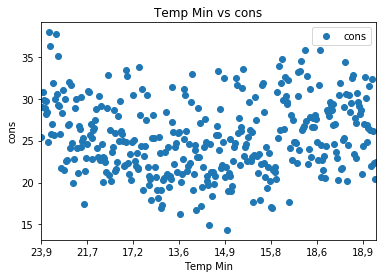

In [27]:
dataset.plot(x='Temp Min', y='cons', style='o')  
plt.title('Temp Min vs cons')  
plt.xlabel('Temp Min')  
plt.ylabel('cons')  
plt.show()

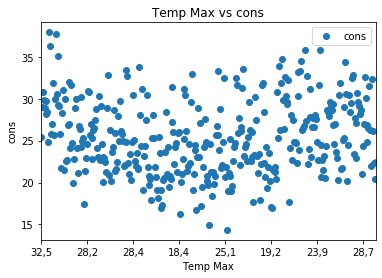

In [28]:
dataset.plot(x='Temp Max', y='cons', style='o')  
plt.title('Temp Max vs cons')  
plt.xlabel('Temp Max')  
plt.ylabel('cons')  
plt.show()

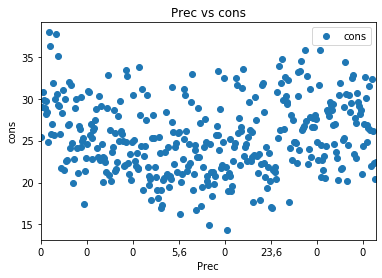

In [29]:
dataset.plot(x='Prec', y='cons', style='o')  
plt.title('Prec vs cons')  
plt.xlabel('Prec')  
plt.ylabel('cons')  
plt.show()

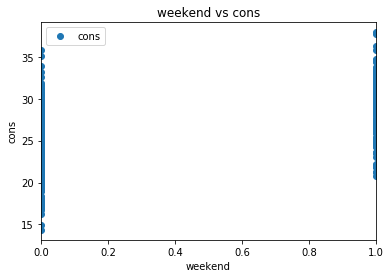

In [30]:
dataset.plot(x='weekend', y='cons', style='o')  
plt.title('weekend vs cons')  
plt.xlabel('weekend')  
plt.ylabel('cons')  
plt.show()

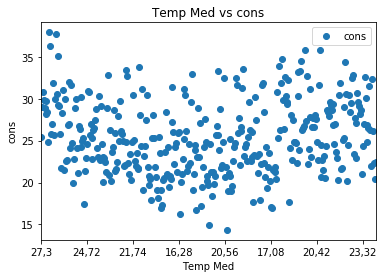

In [31]:
dataset.plot(x='Temp Med', y='cons', style='o')  
plt.title('Temp Med vs cons')  
plt.xlabel('Temp Med')  
plt.ylabel('cons')  
plt.show()

In [44]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
Data        365 non-null object
Temp Med    365 non-null float64
Temp Min    365 non-null float64
Temp Max    365 non-null float64
Prec        365 non-null float64
weekend     365 non-null int64
cons        365 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 20.1+ KB


In [46]:
print(dataset.describe())

         Temp Med    Temp Min    Temp Max        Prec     weekend        cons
count  365.000000  365.000000  365.000000  365.000000  365.000000  365.000000
mean    21.226356   17.461370   26.611507    5.196712    0.284932   25.401367
std      3.180108    2.826185    4.317366   12.417844    0.452001    4.399143
min     12.900000   10.600000   14.500000    0.000000    0.000000   14.343000
25%     19.020000   15.300000   23.800000    0.000000    0.000000   22.008000
50%     21.380000   17.900000   26.900000    0.000000    0.000000   24.867000
75%     23.280000   19.600000   29.400000    3.200000    1.000000   28.631000
max     28.860000   24.500000   36.500000   94.800000    1.000000   37.937000


In [47]:
X = dataset['Temp Max'].values.reshape(-1,1)
y = dataset['cons'].values.reshape(-1,1)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [49]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[7.45820508]
[[0.6689225]]


In [51]:
y_pred = regressor.predict(X_test)

In [52]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,21.593,25.519112
1,33.930,29.532647
2,24.968,25.920466
3,29.972,26.656281
4,24.213,26.321819
...,...,...
68,31.310,26.054250
69,21.327,24.850190
70,20.903,27.124526
71,23.055,21.104224


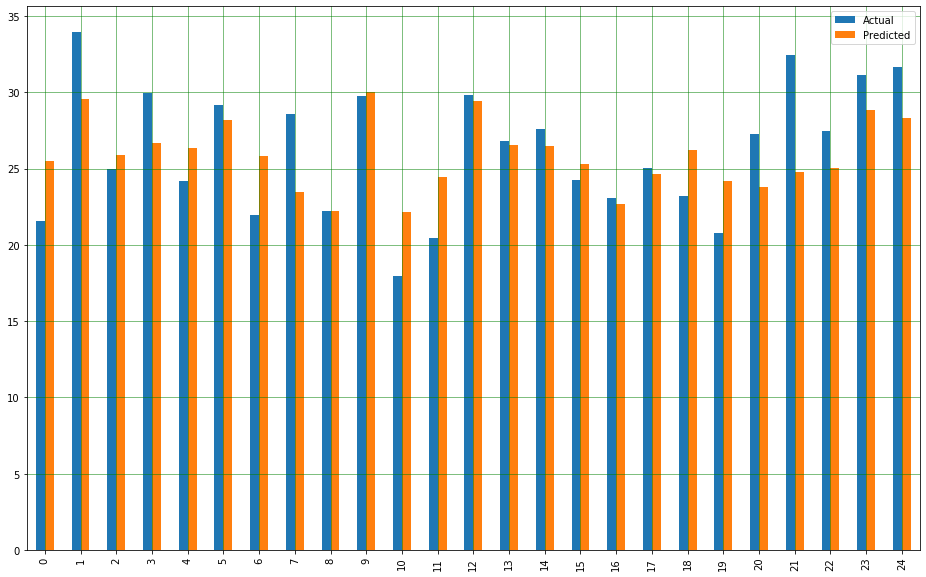

In [53]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

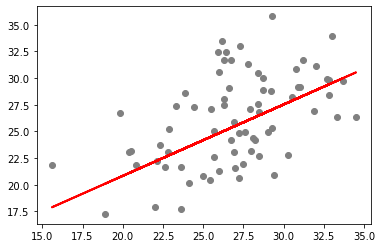

In [54]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [55]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.0620482043970503
Mean Squared Error: 13.978077212631035
Root Mean Squared Error: 3.738726683328301


Data        False
Temp Med    False
Temp Min    False
Temp Max    False
Prec        False
weekend     False
cons        False
dtype: bool

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'